In [1]:
%matplotlib inline
import numpy as np
from pylab import plt

In [2]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

## QoIProcessor example notebook

We first need to import the gait time series wrapper and the gait processor

In [3]:
from pdkit.gait_time_series import GaitTimeSeries
from pdkit.gait_processor import GaitProcessor
from pdkit.dl_processor import QoIProcessor

Using TensorFlow backend.


In [4]:
from pdkit.utils import (butter_lowpass_filter, 
                         crossings_nonzero_pos2neg)

Next we need to load the data into GaitTimeSeries.

In [5]:
ts = GaitTimeSeries().load_data('../tests/data/cloudupdrs_gait.csv', )

Sampling rate is 46.916666666666664 Hz


We can now instanciate the GaitProcessor and start extracting those sweet, sweet gait features from accelerometer data

In [6]:
gp = GaitProcessor(sampling_frequency=100)

In [7]:
rts = gp.resample_signal(ts)

Sampling rate is 96.95833333333333 Hz


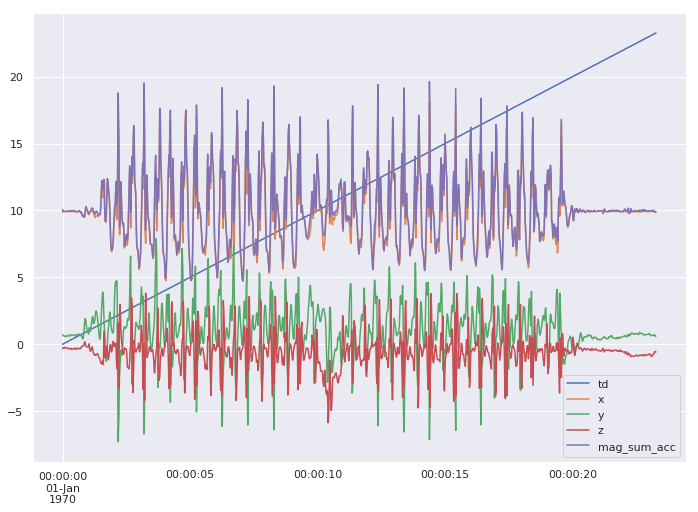

In [8]:
rts.plot()

We can now start the Quality of Information processor. This takes in the window size and number of labels. In this case, we are going to do binary classification so we only have 1 label.

In [9]:
qoi = QoIProcessor(input_shape=(100, 4), labels=1)

Next we need to window the data, since we have it in a big 20second (100 samples per second) chunk. To do so we are using the window_data methof of QoI.

In [18]:
# get the features without time difference
x = rts.drop(columns=['td']).values

# window the data, without providing a target
wx = qoi.window_data(x, window_size=100,  overlap=10)

# generate some random binary targets, for testing only!
y = np.random.randint(low=0, high=2, size=wx.shape[0])

In [20]:
# let's fit the model!
qoi.model.fit(wx, y, batch_size=1, epochs=10, verbose=True)

Epoch 1/10
25/25 [==============================] - 4s 155ms/step - loss: 0.6932 - acc: 0.4800
Epoch 2/10
25/25 [==============================] - 1s 46ms/step - loss: 0.6934 - acc: 0.5200
Epoch 3/10
25/25 [==============================] - 1s 44ms/step - loss: 0.6932 - acc: 0.5200
Epoch 4/10
25/25 [==============================] - 1s 43ms/step - loss: 0.6932 - acc: 0.5200
Epoch 5/10
25/25 [==============================] - 1s 49ms/step - loss: 0.6932 - acc: 0.5200
Epoch 6/10
25/25 [==============================] - 1s 45ms/step - loss: 0.6931 - acc: 0.5200
Epoch 7/10
25/25 [==============================] - 1s 45ms/step - loss: 0.6930 - acc: 0.5200
Epoch 8/10
25/25 [==============================] - 1s 44ms/step - loss: 0.6932 - acc: 0.5200
Epoch 9/10
25/25 [==============================] - 1s 44ms/step - loss: 0.6930 - acc: 0.5200
Epoch 10/10
25/25 [==============================] - 1s 47ms/step - loss: 0.6931 - acc: 0.5200


Since we have used Keras api to define our model you can check how to train, evaluate, save and update this model here:

https://keras.io/